In [1]:
# Install the required google colab libraries

from IPython.display import clear_output

try:
  !pip install pystan
  !pip install prophet
  !pip install hvplot
  !pip install holoviews
except:
  print("Error installing prophet")
finally:
  clear_output()
  print("Prophet was successfully installed")

Prophet was successfully installed


In [2]:
# Import the required libraries and dependencies
import pandas as pd
import holoviews as hv
from prophet import Prophet
import hvplot.pandas
import datetime as dt
%matplotlib inline

Output hidden; open in https://colab.research.google.com to view.

In [3]:
# Upload the "google_hourly_search_trends.csv" file into Colab, then store in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

from google.colab import files
uploaded = files.upload()

df_mercado_trends = pd.read_csv("google_hourly_search_trends.csv",infer_datetime_format=True, parse_dates=True,index_col='Date')

# Review the first and last five rows of the DataFrame
df_mercado_trends.head()

Saving google_hourly_search_trends.csv to google_hourly_search_trends.csv


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


In [17]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Use hvPlot to visualize the data 
df_mercado_trends.hvplot(title='Search Trends 2016 to 2020')

Output hidden; open in https://colab.research.google.com to view.

In [18]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Slice the DataFrame to just the month of May 2020
df_may_2020 = df_mercado_trends.loc['2020-05']

# Use hvPlot to visualize the data for May 2020
df_may_2020.hvplot(title='Search Trends for May 2020')

Output hidden; open in https://colab.research.google.com to view.

In [5]:
# Calculate the sum of the total search traffic for May 2020
traffic_may_2020 = df_may_2020.sum()

traffic_may_2020

Search Trends    38181
dtype: int64

In [6]:
# Calcluate the monhtly median search traffic across all months 
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
median_monthly_traffic = df_mercado_trends.groupby([df_mercado_trends.index.year,df_mercado_trends.index.month]).sum().median()

median_monthly_traffic

Search Trends    35172.5
dtype: float64

In [8]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
(traffic_may_2020/median_monthly_traffic-1)*100

Search Trends    8.553557
dtype: float64

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** Traffic in the reporting month was 8% higher than the median trend value

# Mining the Search Traffic for Seasonality

In [22]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# x=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

# Group the hourly search data to plot (use hvPlot) the average traffic by the day of week 
df_mercado_trends.groupby([df_mercado_trends.index.dayofweek]).mean().hvplot(title='Mean Search Trends for the Day of the Week')

Output hidden; open in https://colab.research.google.com to view.

In [23]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

import numpy as np

# df_mercado_trends.dtypes
# Use hvPlot to visualize the hour of the day and day of week search traffic as a heatmap.
df_mercado_trends.hvplot.heatmap(x='index.hour'
                                ,y='index.dayofweek'
                                ,C='Search Trends'
                                ,cmap='blues'
                                ,title='Average Search Trends by Hour of the Day for Days of the Week').aggregate(function=np.mean)

Output hidden; open in https://colab.research.google.com to view.

**Question:** Does any day-of-week effect that you observe concentrate in just a few hours of that day?

**Answer:** Mean traffic is highest around late night mondays into early morning Tuesdays, and picks up again late hours Tuesday, Wednesdays & Thursdays 

In [24]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Group the hourly search data to plot (use hvPlot) the average traffic by the week of the year
df_mercado_trends.groupby([df_mercado_trends.index.isocalendar().week]).mean().hvplot(title='Average Search Trends for Week of the Year')

Output hidden; open in https://colab.research.google.com to view.

**Question:** Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?

**Answer:** While there is an increase starting in the winter holiday period of weeks 40, the peak does not exceed what is observed in early January

# Relating Search Traffic and Stock Price Returns

In [13]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
from google.colab import files
uploaded = files.upload()

df_mercado_stock = pd.read_csv("mercado_stock_price.csv",infer_datetime_format=True, parse_dates=True,index_col='date')
# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

Saving mercado_stock_price.csv to mercado_stock_price (1).csv


,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


In [25]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Use hvPlot to visualize the closing price of the df_mercado_stock DataFrame
df_mercado_stock.hvplot(title='Stock Price Close Values 2015-2020')

Output hidden; open in https://colab.research.google.com to view.

In [28]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data
mercado_stock_trends_df = pd.concat([df_mercado_trends,df_mercado_stock],axis=1,join='inner').dropna()

# View the first and last five rows of the DataFrame
display(mercado_stock_trends_df.shape)
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())

(7067, 2)

,Search Trends,close
2016-06-01 09:00:00,6,135.16
2016-06-01 10:00:00,12,136.63
2016-06-01 11:00:00,22,136.56
2016-06-01 12:00:00,33,136.42
2016-06-01 13:00:00,40,136.10


,Search Trends,close
2020-07-31 11:00:00,20,1105.780
2020-07-31 12:00:00,32,1087.925
2020-07-31 13:00:00,41,1095.800
2020-07-31 14:00:00,47,1110.650
2020-07-31 15:00:00,53,1122.510


### Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms.

In [29]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06) 
first_half_2020 = mercado_stock_trends_df.loc["2020-01":"2020-06",:]

# View the first and last five rows of first_half_2020 DataFrame
display(first_half_2020.head())
display(first_half_2020.tail())


,Search Trends,close
2020-01-02 09:00:00,9,601.085
2020-01-02 10:00:00,14,601.290
2020-01-02 11:00:00,25,615.410
2020-01-02 12:00:00,37,611.400
2020-01-02 13:00:00,50,611.830


,Search Trends,close
2020-06-30 11:00:00,17,976.17
2020-06-30 12:00:00,27,977.50
2020-06-30 13:00:00,37,973.23
2020-06-30 14:00:00,45,976.50
2020-06-30 15:00:00,51,984.93


In [39]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Use hvPlot to visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `hvplot(shared_axes=False, subplots=True).cols(1)`
first_half_2020.hvplot(title='Meracado Trends: 2020-01 to 2020-06', shared_axes=False, subplots=True).cols(1)

Output hidden; open in https://colab.research.google.com to view.

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:** While it is tough to conclude on the trends based on the visualization, it is evident that there is a spike common to both the trends. Post the May 2020 event the stock prices continue to rise although the search trends did not show a corresponding trend. 

In [46]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour
mercado_stock_trends_df['Lagged Search Trends'] = mercado_stock_trends_df['Search Trends'].shift(1) 

# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
mercado_stock_trends_df['Hourly Stock Returns'] = mercado_stock_trends_df['close'].pct_change() 
mercado_stock_trends_df['Stock Volatility'] = mercado_stock_trends_df['Hourly Stock Returns'].rolling(window=4).std()

display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())

,Search Trends,close,Lagged Search Trends,Hourly Stock Returns,Stock Volatility
2016-06-01 09:00:00,6,135.16,NaN,NaN,NaN
2016-06-01 10:00:00,12,136.63,6.0,0.010876,NaN
2016-06-01 11:00:00,22,136.56,12.0,-0.000512,NaN
2016-06-01 12:00:00,33,136.42,22.0,-0.001025,NaN
2016-06-01 13:00:00,40,136.10,33.0,-0.002346,0.006134


,Search Trends,close,Lagged Search Trends,Hourly Stock Returns,Stock Volatility
2020-07-31 11:00:00,20,1105.780,11.0,0.006380,0.012837
2020-07-31 12:00:00,32,1087.925,20.0,-0.016147,0.013549
2020-07-31 13:00:00,41,1095.800,32.0,0.007239,0.013295
2020-07-31 14:00:00,47,1110.650,41.0,0.013552,0.013001
2020-07-31 15:00:00,53,1122.510,47.0,0.010678,0.013566


In [34]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Use hvPlot to visualize the stock volatility
mercado_stock_trends_df['Stock Volatility','Stock Returns'].hvplot(title='Trend in Stock Volatility')

Output hidden; open in https://colab.research.google.com to view.

**Note:** During the first half of 2020 volatility spiked, and tended to stay high. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [48]:
mercado_stock_trends_df[['Stock Volatility','Lagged Search Trends','Hourly Stock Returns']].corr()

,Stock Volatility,Lagged Search Trends,Hourly Stock Returns
Stock Volatility,1.000000,-0.148938,0.061424
Lagged Search Trends,-0.148938,1.000000,0.017929
Hourly Stock Returns,0.061424,0.017929,1.000000


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:** # There is no strong relation between the three variables.

# Time Series Forecast with Prophet

In [55]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
mercado_prophet_df = df_mercado_trends.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet
mercado_prophet_df=mercado_prophet_df.rename({'Date':'ds'
                                              ,'Search Trends':'y'},axis=1)

# Drop an NaN values from the prophet_df DataFrame
mercado_prophet_df = mercado_prophet_df.dropna() 


# View the first and last five rows of the mercado_prophet_df DataFrame
display(mercado_prophet_df.head())
display(mercado_prophet_df.tail())

,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


,ds,y
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97
37105,2020-09-08 00:00:00,96


In [57]:
# Call the Prophet function, store as an object
model_mercado_trends = Prophet()

model_mercado_trends

In [58]:
# Fit the time-series model.
model_mercado_trends.fit(mercado_prophet_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpm0bldsio/r9r84aek.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm0bldsio/98rcpiw6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36904', 'data', 'file=/tmp/tmpm0bldsio/r9r84aek.json', 'init=/tmp/tmpm0bldsio/98rcpiw6.json', 'output', 'file=/tmp/tmpm0bldsio/prophet_model2299zxjt/prophet_model-20230221204718.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:47:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:47:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [59]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_trends = model_mercado_trends.make_future_dataframe(periods=2000,freq='H')
# View the last five rows of the future_mercado_trends DataFrame
display(future_mercado_trends.head())
display(future_mercado_trends.tail())

,ds
0,2016-06-01 00:00:00
1,2016-06-01 01:00:00
2,2016-06-01 02:00:00
3,2016-06-01 03:00:00
4,2016-06-01 04:00:00


,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [60]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = model_mercado_trends.predict(future_mercado_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
display(forecast_mercado_trends.head())
display(forecast_mercado_trends.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.273500,80.431009,97.635190,44.273500,44.273500,45.290820,45.290820,45.290820,41.452721,...,1.860346,1.860346,1.860346,1.977752,1.977752,1.977752,0.0,0.0,0.0,89.564320
1,2016-06-01 01:00:00,44.274505,76.903818,93.814395,44.274505,44.274505,41.736647,41.736647,41.736647,37.943554,...,1.810263,1.810263,1.810263,1.982830,1.982830,1.982830,0.0,0.0,0.0,86.011152
2,2016-06-01 02:00:00,44.275511,67.513916,84.822604,44.275511,44.275511,31.413187,31.413187,31.413187,27.656623,...,1.768689,1.768689,1.768689,1.987876,1.987876,1.987876,0.0,0.0,0.0,75.688698
3,2016-06-01 03:00:00,44.276516,51.699465,69.207238,44.276516,44.276516,16.145999,16.145999,16.145999,12.417392,...,1.735716,1.735716,1.735716,1.992891,1.992891,1.992891,0.0,0.0,0.0,60.422515
4,2016-06-01 04:00:00,44.277521,34.781427,50.924884,44.277521,44.277521,-0.968848,-0.968848,-0.968848,-4.678022,...,1.711300,1.711300,1.711300,1.997874,1.997874,1.997874,0.0,0.0,0.0,43.308673


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
39101,2020-11-30 04:00:00,44.992190,30.900322,48.089421,43.977768,46.117606,-5.446901,-5.446901,-5.446901,-4.678022,...,-1.746710,-1.746710,-1.746710,0.977832,0.977832,0.977832,0.0,0.0,0.0,39.545289
39102,2020-11-30 05:00:00,44.991427,15.930198,32.527620,43.975147,46.117453,-20.917300,-20.917300,-20.917300,-20.514470,...,-1.384832,-1.384832,-1.384832,0.982002,0.982002,0.982002,0.0,0.0,0.0,24.074127
39103,2020-11-30 06:00:00,44.990663,3.114070,20.465157,43.972525,46.117298,-32.882237,-32.882237,-32.882237,-32.844556,...,-1.023815,-1.023815,-1.023815,0.986135,0.986135,0.986135,0.0,0.0,0.0,12.108426
39104,2020-11-30 07:00:00,44.989899,-3.783186,13.384689,43.969903,46.117078,-40.153661,-40.153661,-40.153661,-40.477971,...,-0.665922,-0.665922,-0.665922,0.990231,0.990231,0.990231,0.0,0.0,0.0,4.836238
39105,2020-11-30 08:00:00,44.989136,-6.566226,10.632661,43.967281,46.116859,-42.347823,-42.347823,-42.347823,-43.028756,...,-0.313357,-0.313357,-0.313357,0.994290,0.994290,0.994290,0.0,0.0,0.0,2.641312


In [73]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Plot the Prophet predictions for the Mercado trends data
model_mercado_trends.plot(forecast_mercado_trends)


# forecast_mercado_trends.loc[forecast_mercado_trends['ds']>='2020-05-01'].hvplot(x='ds',y='yhat',width=2500)

Output hidden; open in https://colab.research.google.com to view.

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:** # In the near-term the trend in search volumes are expected to go down

# Reviewing the components of forecasts

In [76]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_mercado_trends = forecast_mercado_trends.set_index('ds')

# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
display(forecast_mercado_trends.shape)
display(forecast_mercado_trends[['yhat','yhat_upper','yhat_lower']].head())
display(forecast_mercado_trends[['yhat','yhat_upper','yhat_lower']].tail())

(39106, 21)

,yhat,yhat_upper,yhat_lower
ds,,,
2016-06-01 00:00:00,89.564320,97.635190,80.431009
2016-06-01 01:00:00,86.011152,93.814395,76.903818
2016-06-01 02:00:00,75.688698,84.822604,67.513916
2016-06-01 03:00:00,60.422515,69.207238,51.699465
2016-06-01 04:00:00,43.308673,50.924884,34.781427


,yhat,yhat_upper,yhat_lower
ds,,,
2020-11-30 04:00:00,39.545289,48.089421,30.900322
2020-11-30 05:00:00,24.074127,32.527620,15.930198
2020-11-30 06:00:00,12.108426,20.465157,3.114070
2020-11-30 07:00:00,4.836238,13.384689,-3.783186
2020-11-30 08:00:00,2.641312,10.632661,-6.566226


Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

In [79]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# From the forecast_mercado_trends DataFrame, use hvPlot to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours 
forecast_mercado_trends[['yhat','yhat_upper','yhat_lower']].iloc[-2000:,].hvplot(width=2500)

Output hidden; open in https://colab.research.google.com to view.

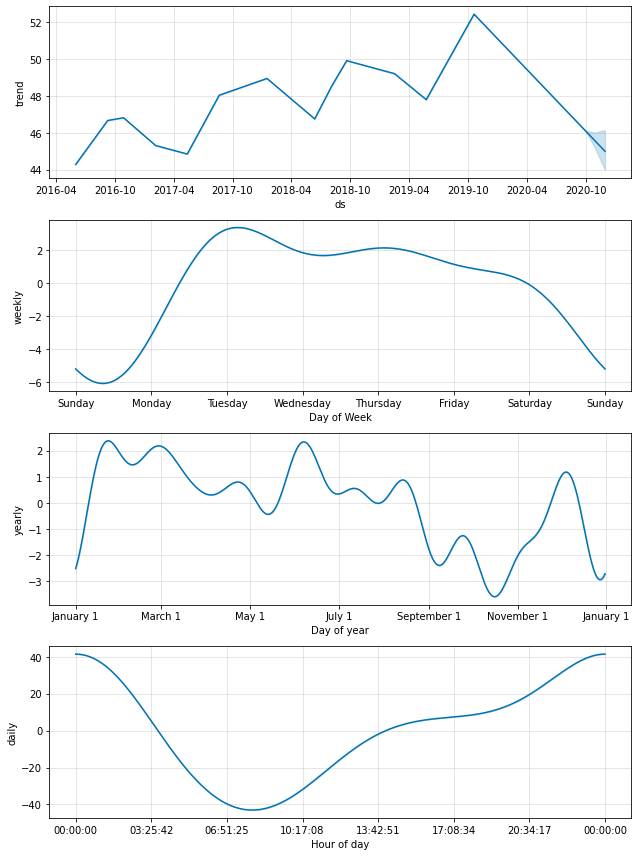

In [80]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends = forecast_mercado_trends.reset_index()

# Use the plot_components function to visualize the forecast results 
# for the forecast_canada DataFrame 
figures_mercado_trends = model_mercado_trends.plot_components(forecast_mercado_trends)

**Question:** What time of day exhibits the greatest popularity?

**Answer:** Popularity increases after 8PM and is highest around mid-night

**Question:** Which day of week gets the most search traffic? 
   
**Answer:** Tuesday's get the most search traffic

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:** Lowest search traffic is in October

# Forecasting Revenue using Prophet Time Series Model

In [82]:
# Upload the "mercado_daily_revenue.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the DatetimeIndex
# Sales are quoted in millions of US dollars
from google.colab import files
uploaded = files.upload()

df_mercado_sales = pd.read_csv("mercado_daily_revenue.csv",infer_datetime_format=True, parse_dates=True, index_col='date')

# Review the DataFrame
display(df_mercado_sales.head())
display(df_mercado_sales.tail())

Saving mercado_daily_revenue.csv to mercado_daily_revenue (1).csv


,Daily Sales
date,
2019-01-01,0.626452
2019-01-02,1.301069
2019-01-03,1.751689
2019-01-04,3.256294
2019-01-05,3.732920


,Daily Sales
date,
2020-05-10,17.467814
2020-05-11,17.537152
2020-05-12,18.031773
2020-05-13,19.165315
2020-05-14,20.246570


In [94]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Use hvPlot to visualize the daily sales figures 
display(df_mercado_sales.hvplot(title='Revenue Time Series'))

display(df_mercado_sales.hvplot.heatmap(x='index.month'
                                        ,y='index.year'
                                        ,C='Daily Sales'
                                        ,cmap='blues'
                                        ,title='Average Daily Sales by Month and Year').aggregate(function=np.mean))

display(df_mercado_sales.hvplot.heatmap(x='index.isoweek().week'
                                        ,y='index.year'
                                        ,C='Daily Sales'
                                        ,cmap='blues'
                                        ,title='Average Daily Sales by Week and Year').aggregate(function=np.mean))

display(df_mercado_sales.hvplot.heatmap(x='index.day'
                                        ,y='index.month'
                                        ,C='Daily Sales'
                                        ,cmap='blues'
                                        ,title='Average Daily Sales by Month and Day').aggregate(function=np.mean))

display(df_mercado_sales.hvplot.line(x='index.isoweek().week'
                                        ,y='Daily Sales').aggregate(function=np.mean))

Output hidden; open in https://colab.research.google.com to view.

Based on the plots above average daily sales has been trending upward for M/s Mercado. Average daily sales are lowest in June and highest in December. Average daily sales increased significantly in 2020.

In [96]:
# Apply a Facebook Prophet model to the data.

# Set up the dataframe in the neccessary format:
# Reset the index so that date becomes a column in the DataFrame
mercado_sales_prophet_df = df_mercado_sales.reset_index()

# Adjust the columns names to the Prophet syntax
mercado_sales_prophet_df.columns.values[0] = 'ds'
mercado_sales_prophet_df.columns.values[1] = 'y'

# Visualize the DataFrame
display(mercado_sales_prophet_df.shape)
display(mercado_sales_prophet_df.head())
display(mercado_sales_prophet_df.tail())

(500, 2)

,ds,y
0,2019-01-01,0.626452
1,2019-01-02,1.301069
2,2019-01-03,1.751689
3,2019-01-04,3.256294
4,2019-01-05,3.732920


,ds,y
495,2020-05-10,17.467814
496,2020-05-11,17.537152
497,2020-05-12,18.031773
498,2020-05-13,19.165315
499,2020-05-14,20.246570


In [97]:
# Create the model
mercado_sales_prophet_model = Prophet()

# Fit the model
mercado_sales_prophet_model.fit(mercado_sales_prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm0bldsio/yqei2x9b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm0bldsio/ic915hvf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47605', 'data', 'file=/tmp/tmpm0bldsio/yqei2x9b.json', 'init=/tmp/tmpm0bldsio/ic915hvf.json', 'output', 'file=/tmp/tmpm0bldsio/prophet_model8iuwldkt/prophet_model-20230221222650.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:26:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:26:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [98]:
# Predict sales for 90 days (1 quarter) out into the future.

# Start by making a future dataframe
mercado_sales_prophet_future = mercado_sales_prophet_model.make_future_dataframe(periods=90,freq='D')

# Display the last five rows of the future DataFrame
display(mercado_sales_prophet_future.shape)
display(mercado_sales_prophet_future.head())
display(mercado_sales_prophet_future.tail())

(590, 1)

,ds
0,2019-01-01
1,2019-01-02
2,2019-01-03
3,2019-01-04
4,2019-01-05


,ds
585,2020-08-08
586,2020-08-09
587,2020-08-10
588,2020-08-11
589,2020-08-12


In [99]:
# Make predictions for the sales each day over the next quarter
mercado_sales_prophet_forecast = mercado_sales_prophet_model.predict(mercado_sales_prophet_future)

# Display the first 5 rows of the resulting DataFrame
display(mercado_sales_prophet_forecast.shape)
display(mercado_sales_prophet_forecast.head())
display(mercado_sales_prophet_forecast.tail())

(590, 16)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,0.132601,-1.847234,2.095830,0.132601,0.132601,0.063960,0.063960,0.063960,0.063960,0.063960,0.063960,0.0,0.0,0.0,0.196561
1,2019-01-02,0.171786,-1.533299,2.198221,0.171786,0.171786,0.083109,0.083109,0.083109,0.083109,0.083109,0.083109,0.0,0.0,0.0,0.254896
2,2019-01-03,0.210972,-1.618126,2.083929,0.210972,0.210972,0.019668,0.019668,0.019668,0.019668,0.019668,0.019668,0.0,0.0,0.0,0.230640
3,2019-01-04,0.250157,-1.856263,2.194170,0.250157,0.250157,-0.058251,-0.058251,-0.058251,-0.058251,-0.058251,-0.058251,0.0,0.0,0.0,0.191905
4,2019-01-05,0.289342,-1.691462,2.113932,0.289342,0.289342,-0.124438,-0.124438,-0.124438,-0.124438,-0.124438,-0.124438,0.0,0.0,0.0,0.164904


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
585,2020-08-08,23.220454,21.152366,25.118339,23.217602,23.223206,-0.124438,-0.124438,-0.124438,-0.124438,-0.124438,-0.124438,0.0,0.0,0.0,23.096016
586,2020-08-09,23.260064,21.406494,25.175684,23.257158,23.262867,-0.034280,-0.034280,-0.034280,-0.034280,-0.034280,-0.034280,0.0,0.0,0.0,23.225785
587,2020-08-10,23.299674,21.625011,25.239024,23.296708,23.302527,0.050232,0.050232,0.050232,0.050232,0.050232,0.050232,0.0,0.0,0.0,23.349906
588,2020-08-11,23.339284,21.522466,25.226268,23.336269,23.342177,0.063960,0.063960,0.063960,0.063960,0.063960,0.063960,0.0,0.0,0.0,23.403244
589,2020-08-12,23.378894,21.628095,25.438035,23.375836,23.381816,0.083109,0.083109,0.083109,0.083109,0.083109,0.083109,0.0,0.0,0.0,23.462003


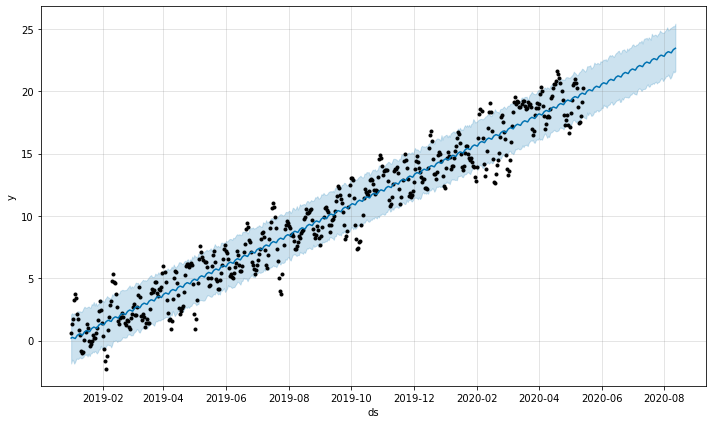

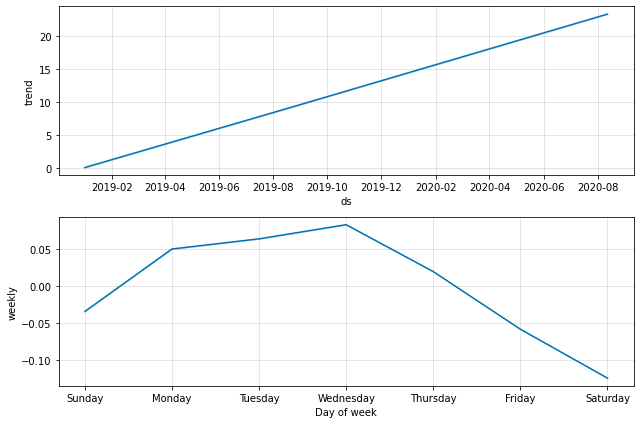

In [103]:
# Use the plot_components function to analyze seasonal patterns in the company's revenue
mercado_sales_prophet_model.plot(mercado_sales_prophet_forecast)

figures=mercado_sales_prophet_model.plot_components(mercado_sales_prophet_forecast)

**Question:** For example, what are the peak revenue days? (Mondays? Fridays? Something else?)

**Answer:** # Sales is the highest on Wednesdays, followed by Tuesdays


In [107]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Plot the predictions for the Mercado sales
mercado_sales_prophet_forecast[['ds','yhat','yhat_upper','yhat_lower']].iloc[-90:].hvplot(x='ds',title='Sales forecast for the Next Quarter')

Output hidden; open in https://colab.research.google.com to view.

In [108]:
# For the mercado_sales_prophet_forecast DataFrame, set the ds column as the DataFrame Index
mercado_sales_prophet_forecast = mercado_sales_prophet_forecast.set_index('ds')

# Display the first and last five rows of the DataFrame
display(mercado_sales_prophet_forecast.shape)
display(mercado_sales_prophet_forecast.head())
display(mercado_sales_prophet_forecast.tail())

(590, 15)

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2019-01-01,0.132601,-1.847234,2.095830,0.132601,0.132601,0.063960,0.063960,0.063960,0.063960,0.063960,0.063960,0.0,0.0,0.0,0.196561
2019-01-02,0.171786,-1.533299,2.198221,0.171786,0.171786,0.083109,0.083109,0.083109,0.083109,0.083109,0.083109,0.0,0.0,0.0,0.254896
2019-01-03,0.210972,-1.618126,2.083929,0.210972,0.210972,0.019668,0.019668,0.019668,0.019668,0.019668,0.019668,0.0,0.0,0.0,0.230640
2019-01-04,0.250157,-1.856263,2.194170,0.250157,0.250157,-0.058251,-0.058251,-0.058251,-0.058251,-0.058251,-0.058251,0.0,0.0,0.0,0.191905
2019-01-05,0.289342,-1.691462,2.113932,0.289342,0.289342,-0.124438,-0.124438,-0.124438,-0.124438,-0.124438,-0.124438,0.0,0.0,0.0,0.164904


,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2020-08-08,23.220454,21.152366,25.118339,23.217602,23.223206,-0.124438,-0.124438,-0.124438,-0.124438,-0.124438,-0.124438,0.0,0.0,0.0,23.096016
2020-08-09,23.260064,21.406494,25.175684,23.257158,23.262867,-0.034280,-0.034280,-0.034280,-0.034280,-0.034280,-0.034280,0.0,0.0,0.0,23.225785
2020-08-10,23.299674,21.625011,25.239024,23.296708,23.302527,0.050232,0.050232,0.050232,0.050232,0.050232,0.050232,0.0,0.0,0.0,23.349906
2020-08-11,23.339284,21.522466,25.226268,23.336269,23.342177,0.063960,0.063960,0.063960,0.063960,0.063960,0.063960,0.0,0.0,0.0,23.403244
2020-08-12,23.378894,21.628095,25.438035,23.375836,23.381816,0.083109,0.083109,0.083109,0.083109,0.083109,0.083109,0.0,0.0,0.0,23.462003


In [110]:
# Produce a sales forecast for the finance division
# giving them a number for expected total sales next 90 days.
# Provide best case (yhat_upper), worst case (yhat_lower), and most likely (yhat) scenarios.

# Create a forecast_quarter Dataframe for the period 2020-07-01 to 2020-09-30
# The DataFrame should include the columns yhat_upper, yhat_lower, and yhat
mercado_sales_forecast_90day = mercado_sales_prophet_forecast[['yhat','yhat_upper','yhat_lower']].loc['2020-05-15':]

# Update the column names for the forecast_quarter DataFrame
# to match what the finance division is looking for 
mercado_sales_forecast_quarter = mercado_sales_forecast_90day.rename({'yhat':'Most likely'
                                                                      ,'yhat_upper':'Best case scenario'
                                                                      ,'yhat_lower':'Worst case scenario'},axis=1).sum()

# Review the last five rows of the DataFrame
display(mercado_sales_forecast_90day.shape)
# display(mercado_sales_forecast_90day.head())
# display(mercado_sales_forecast_90day.tail())
mercado_sales_forecast_quarter

(90, 3)

Most likely            1945.442938
Best case scenario     2116.711721
Worst case scenario    1773.257721
dtype: float64

### Based on the forecast information generated above, produce a sales forecast for the finance division, giving them a number for expected total sales next quarter. Include best and worst case scenarios, to better help the finance team plan.

**Answer:** The expected total sales for next 90 days is `$1950` (~`$22` per day). In the best case scenario a total sales of `$2100` may be expected (`$23` per day) or in the worst case `$1800` may be expected (`$19` per day). 